In [36]:
maze = [
    [1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 1)
end = (9, 9)

# VISUALISATION 

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import time

def visualize_maze(maze, path=None, explored=None, start=(0, 1), end=(9, 9), delay=0.1):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots()
    maze_np = np.array(maze)
    
    maze_display = np.zeros((rows, cols, 3))
    maze_display[maze_np == 1] = [0, 0, 0]  # Black for walls
    maze_display[maze_np == 0] = [1, 1, 1]  # White for paths
    
    maze_display[start] = [0, 1, 0]  # Green for start
    maze_display[end] = [1, 0, 0]    # Red for end
    
    if path:
        for r, c in path:
            maze_display[r, c] = [0, 0, 1] 
    
    if explored:
        for r, c in explored:
            if (r, c) != start and (r, c) != end:
                maze_display[r, c] = [1, 1, 0] 
    
    ax.imshow(maze_display, interpolation='none')
    ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
    ax.set_xticks(np.arange(-.5, cols, 1))
    ax.set_yticks(np.arange(-.5, rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.draw()
    plt.pause(delay)

# Breadth-First-Search (BFS)

In [38]:
def bfs_visualized(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    explored = []

    start_time = time.time()
    
    while queue:
        current = queue.popleft()
        explored.append(current)

        visualize_maze(maze, None, explored, start, end)
        
        if current == end:
            path = []
            while current:
                path.append(current)
                current = parent[current]
            path.reverse()

            visualize_maze(maze, path, explored, start, end)  
            return path, explored, time.time() - start_time
        
        r, c = current
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            rr, cc = r + dr, c + dc
            if 0 <= rr < rows and 0 <= cc < cols and maze[rr][cc] == 0 and (rr, cc) not in visited:
                queue.append((rr, cc))
                visited.add((rr, cc))
                parent[(rr, cc)] = current
    
    return None, explored, time.time() - start_time


# Depth-First-Search (DFS)

In [39]:
def dfs_visualized(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set([start])
    parent = {start: None}
    explored = []

    start_time = time.time()

    while stack:
        current = stack.pop()
        explored.append(current)

        visualize_maze(maze, None, explored, start, end)
        
        if current == end:
            path = []
            while current:
                path.append(current)
                current = parent[current]
            path.reverse()

            visualize_maze(maze, path, explored, start, end)  
            return path, explored, time.time() - start_time
        
        r, c = current
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            rr, cc = r + dr, c + dc
            if 0 <= rr < rows and 0 <= cc < cols and maze[rr][cc] == 0 and (rr, cc) not in visited:
                stack.append((rr, cc))
                visited.add((rr, cc))
                parent[(rr, cc)] = current
    
    return None, explored, time.time() - start_time

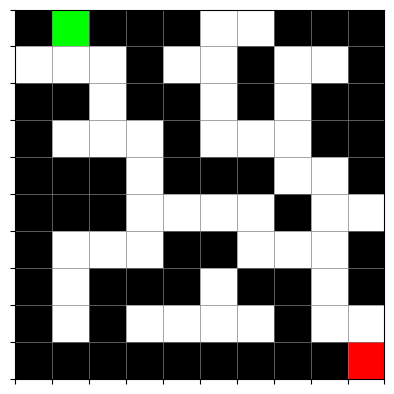

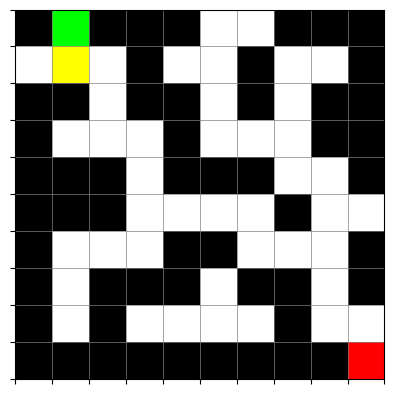

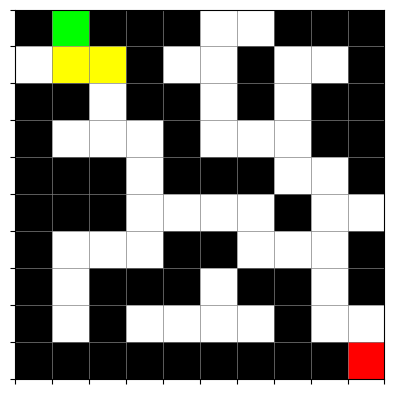

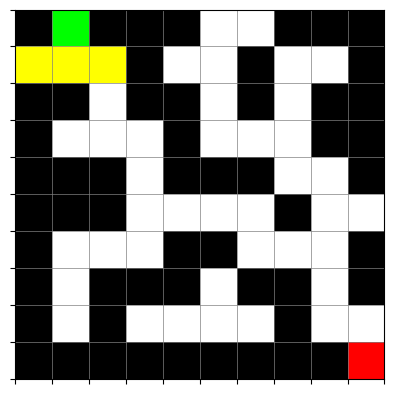

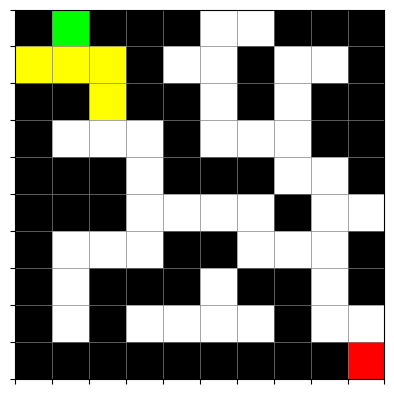

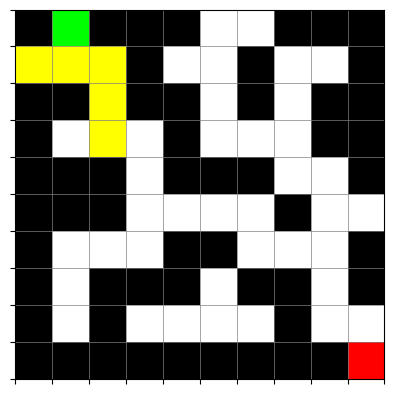

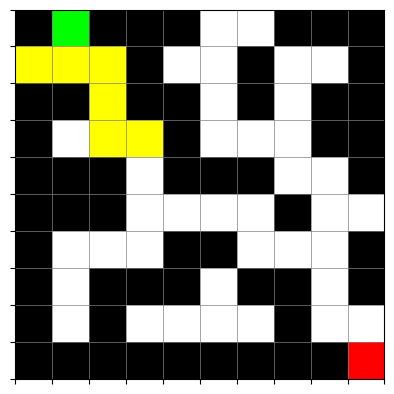

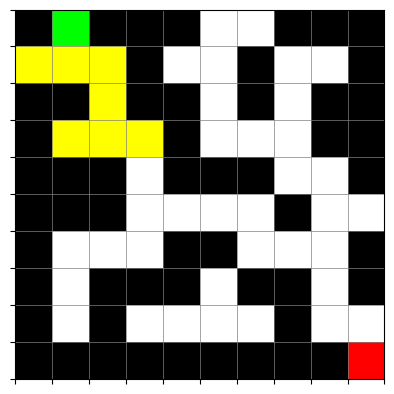

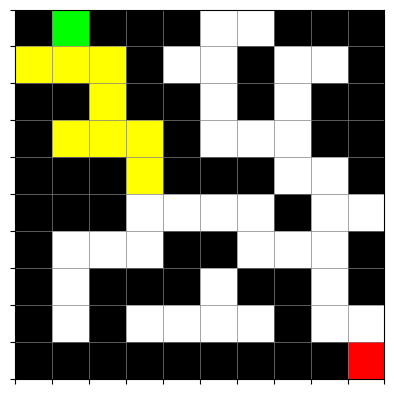

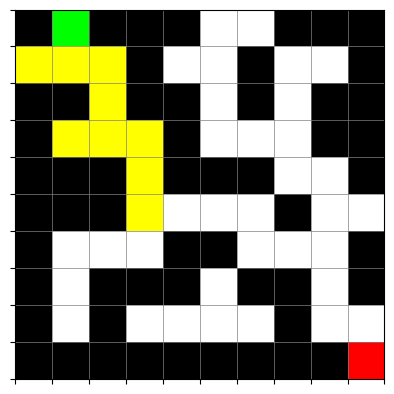

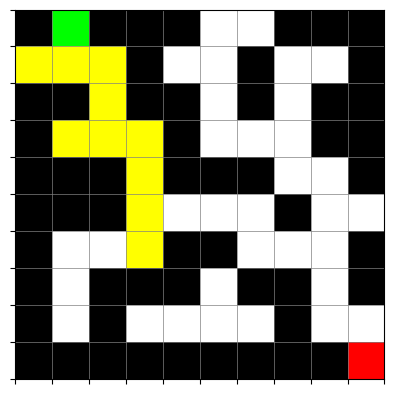

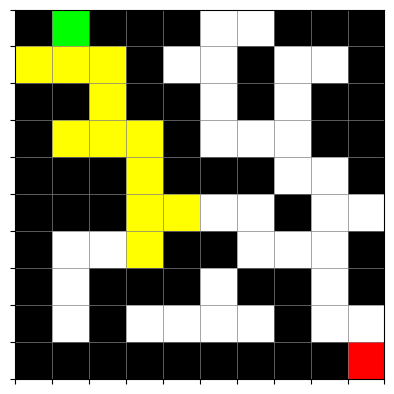

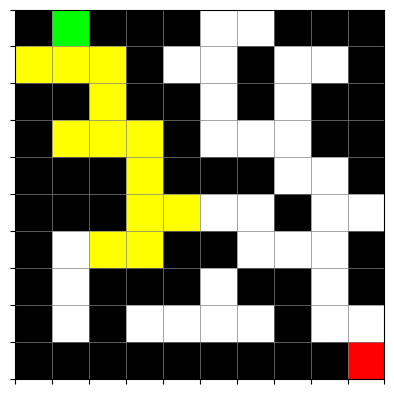

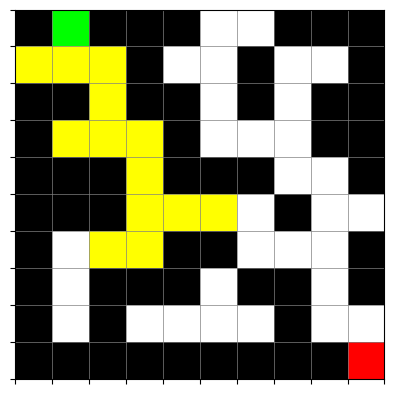

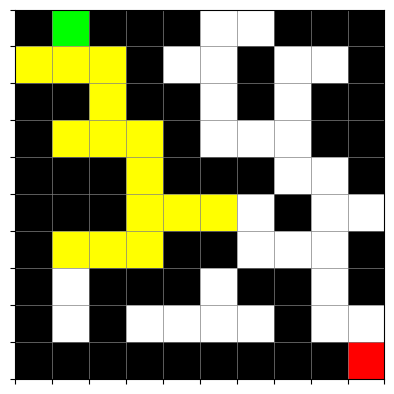

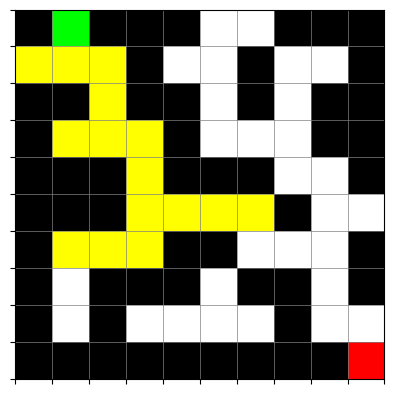

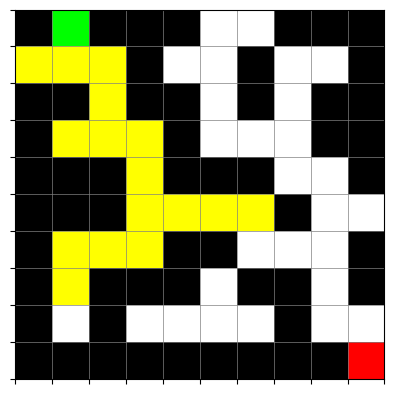

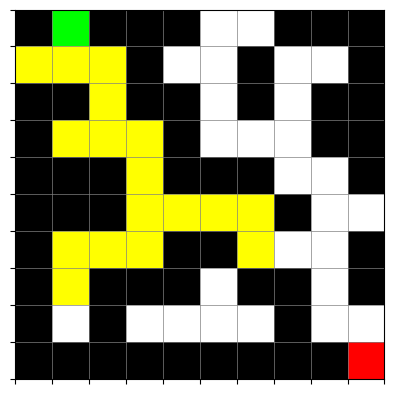

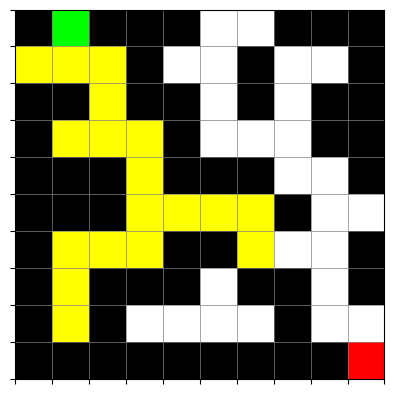

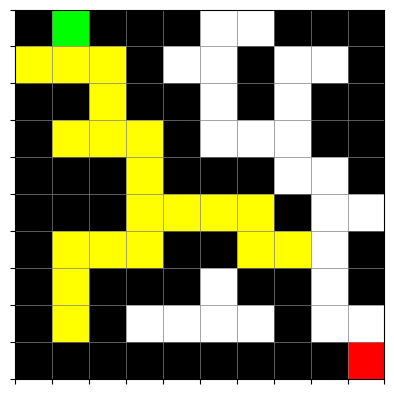

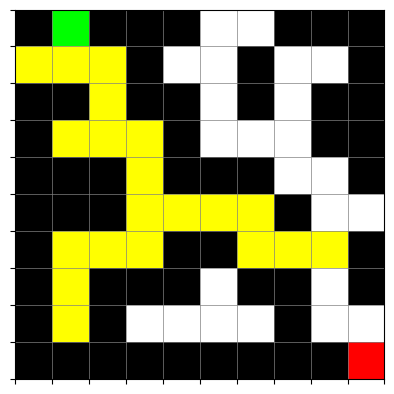

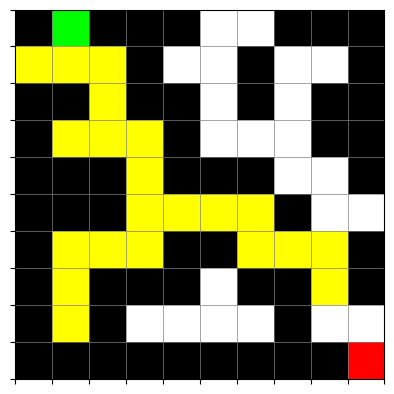

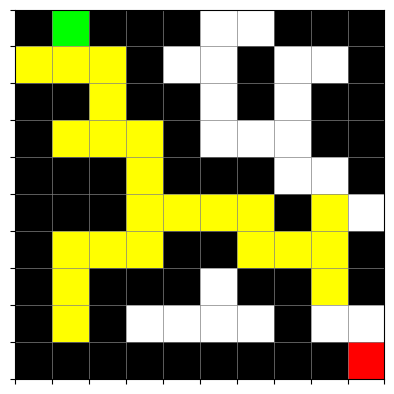

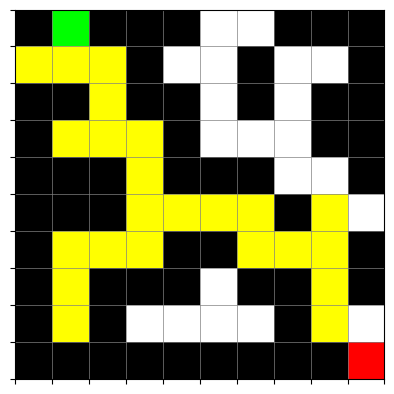

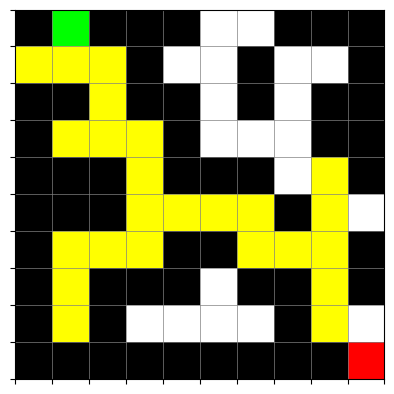

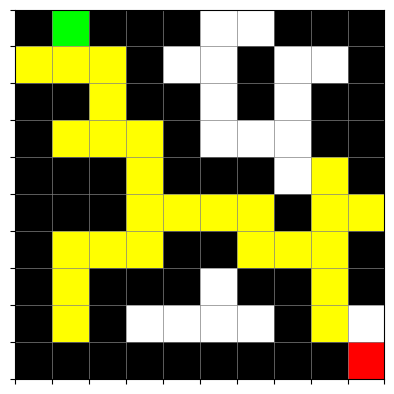

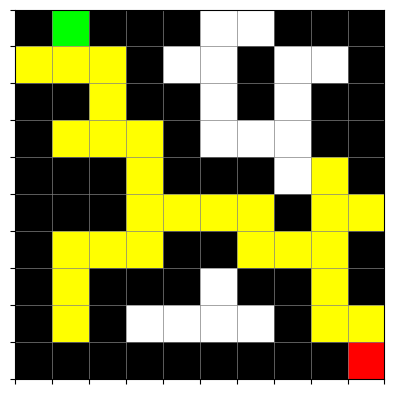

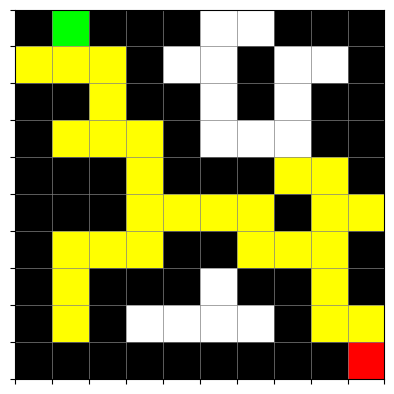

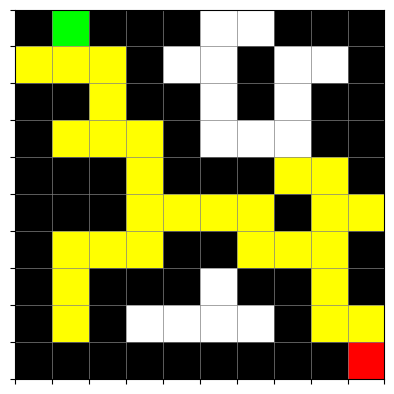

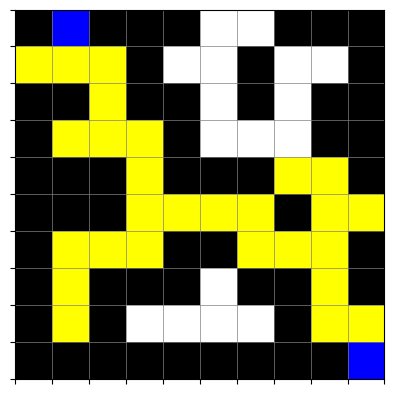

In [40]:
# Run BFS with visualization
bfs_path, bfs_explored, bfs_time = bfs_visualized(maze, start, end)

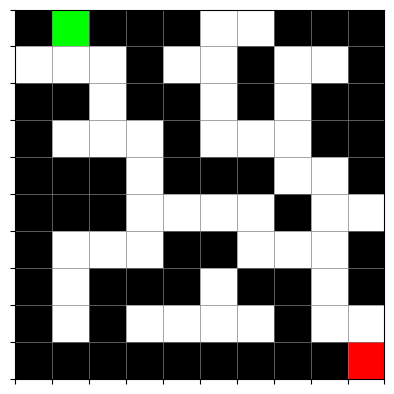

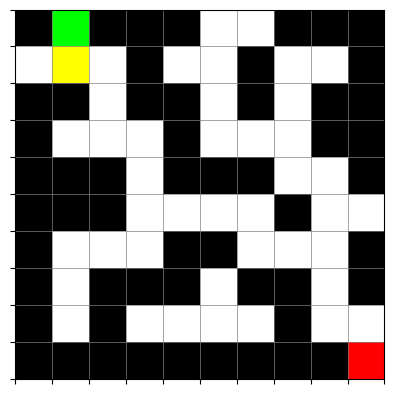

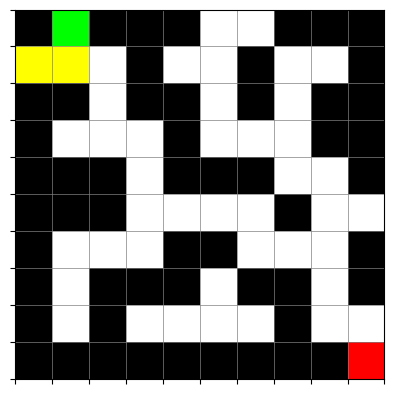

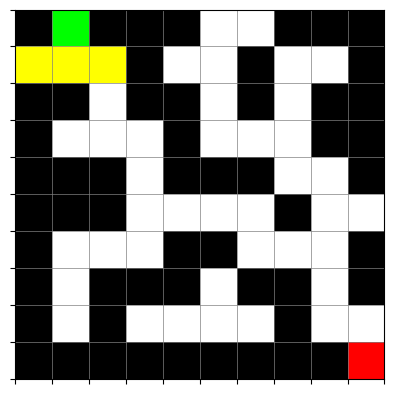

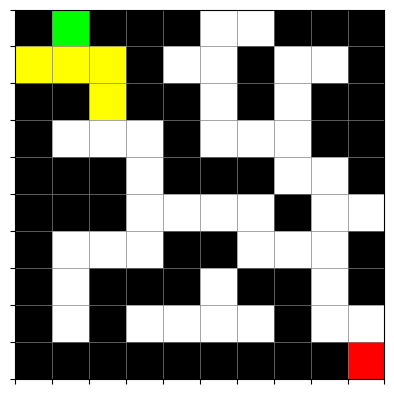

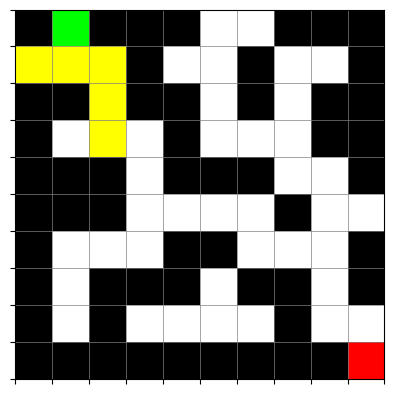

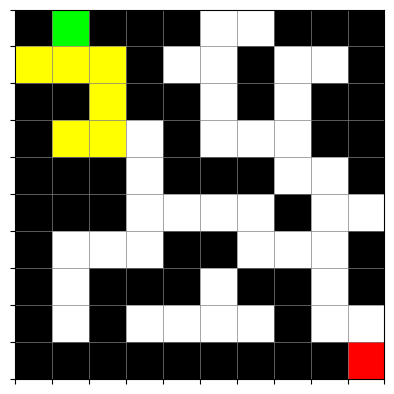

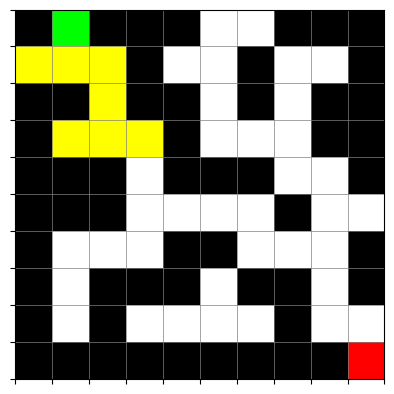

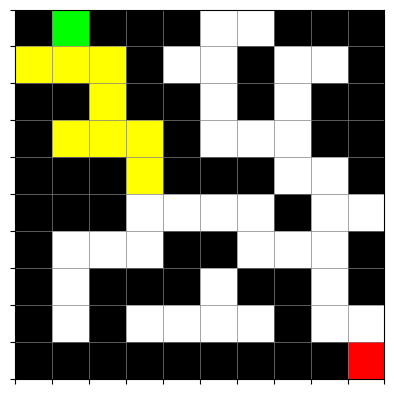

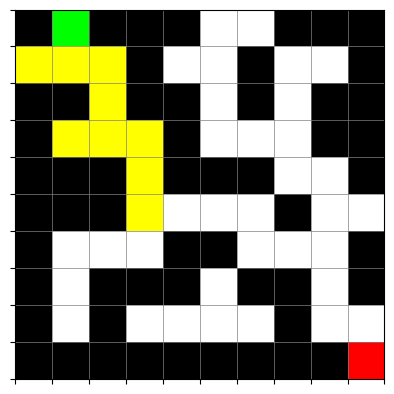

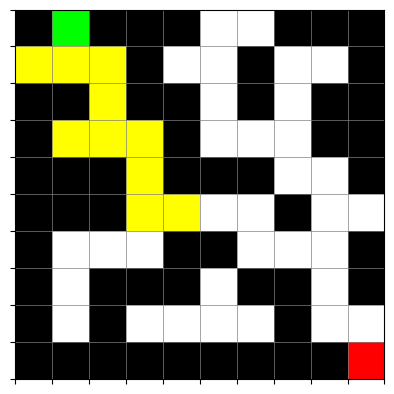

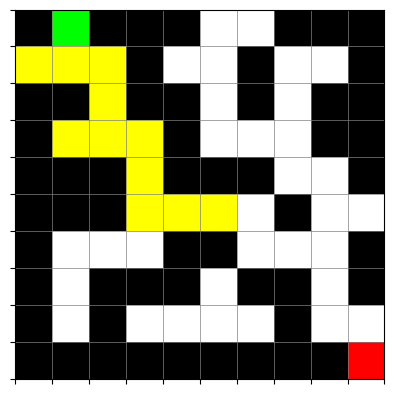

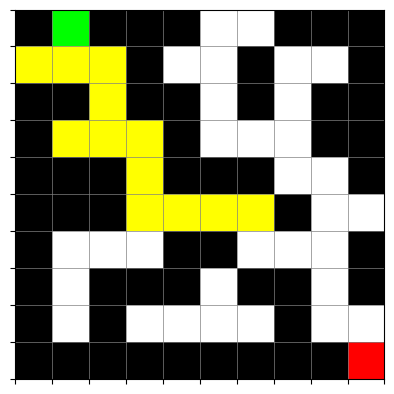

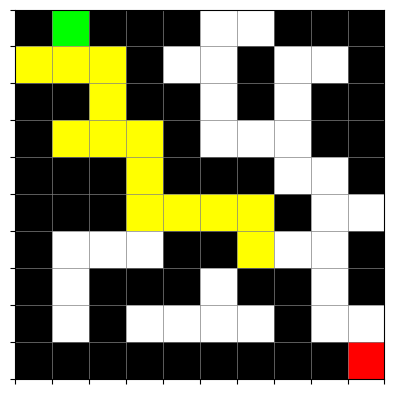

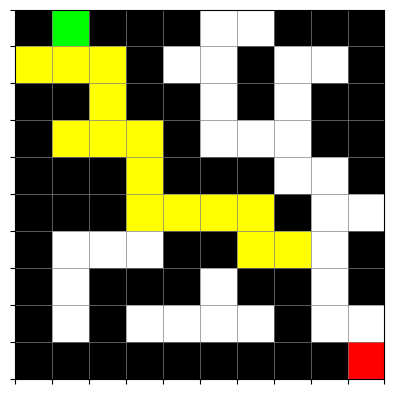

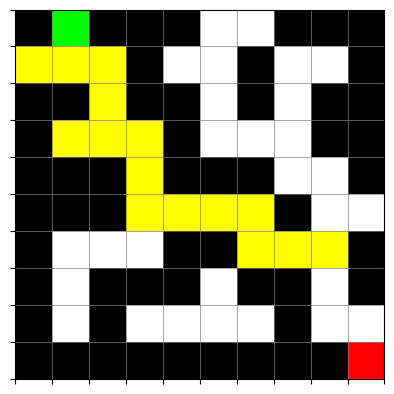

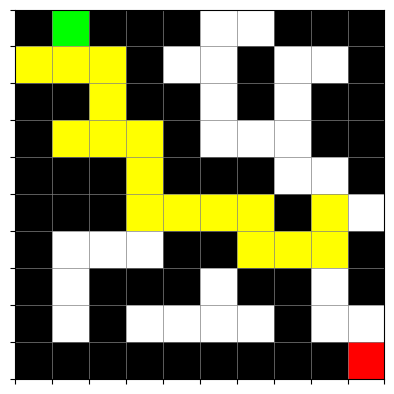

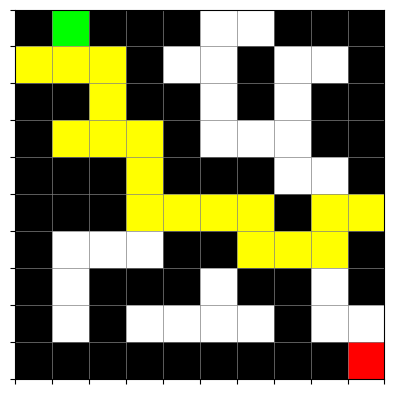

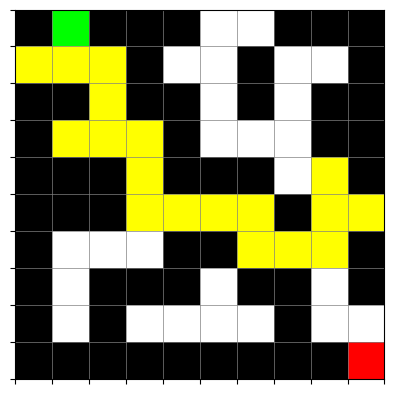

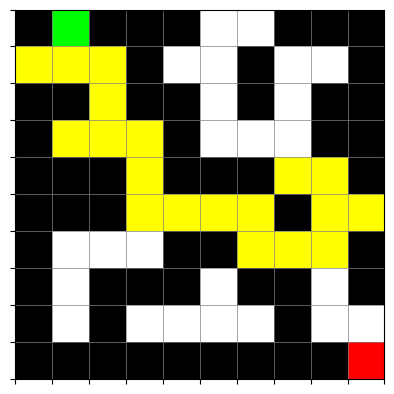

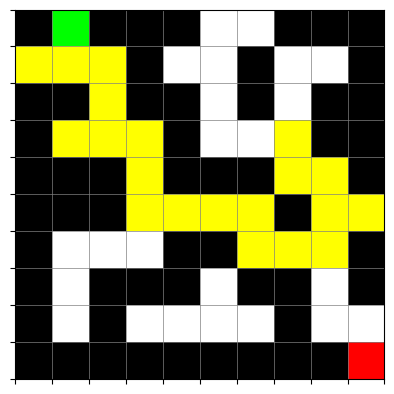

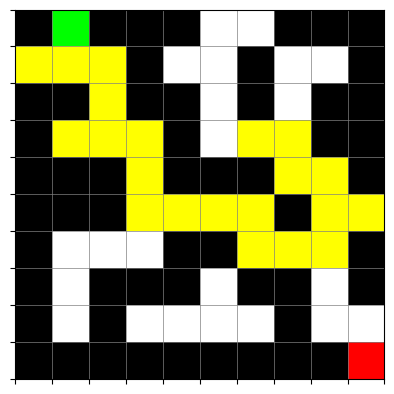

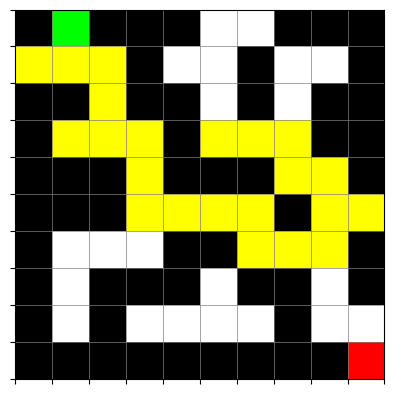

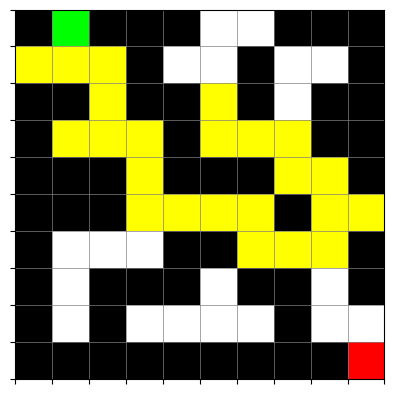

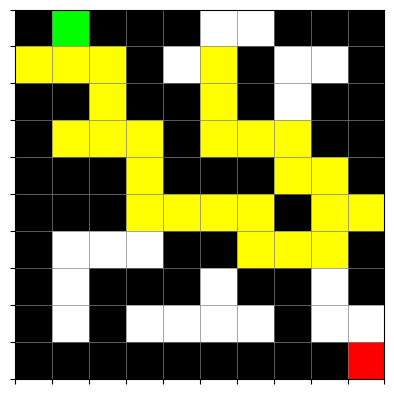

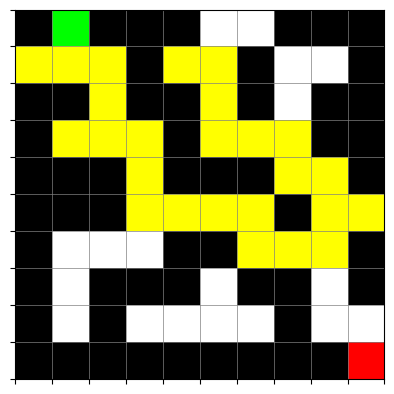

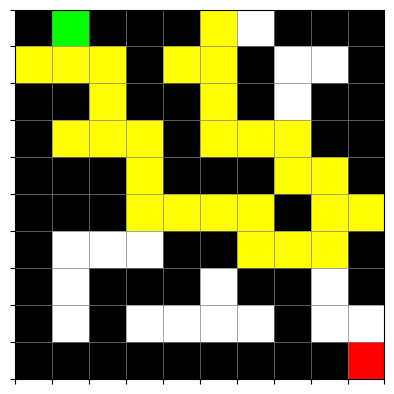

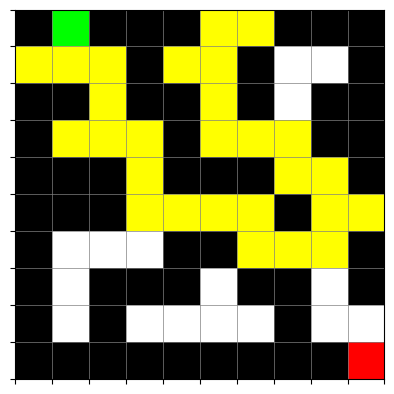

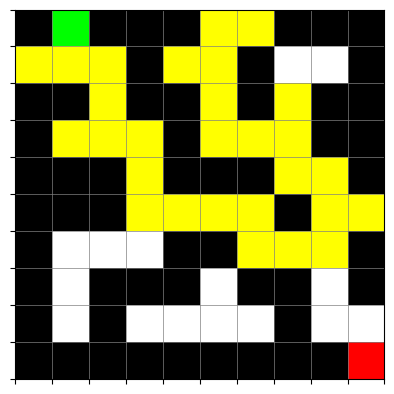

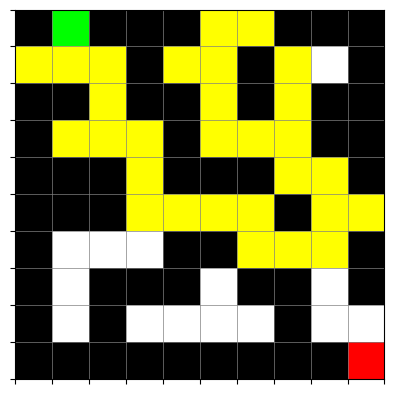

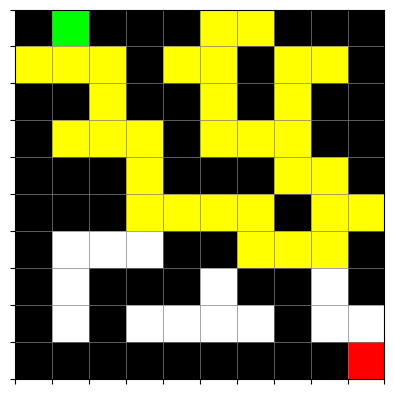

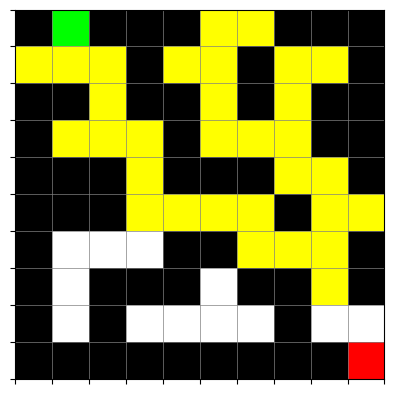

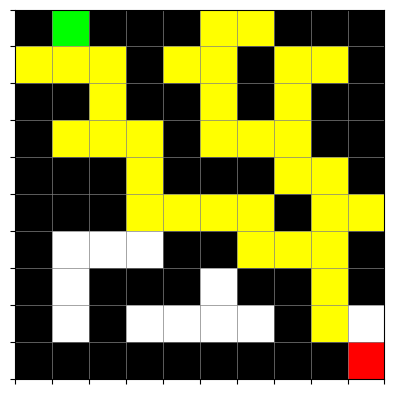

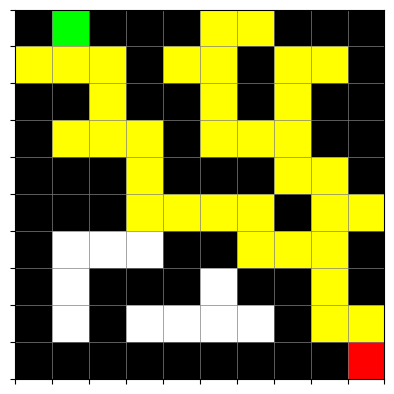

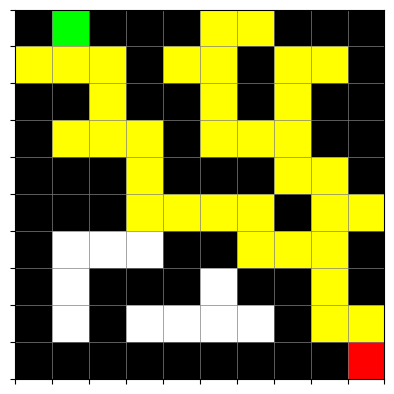

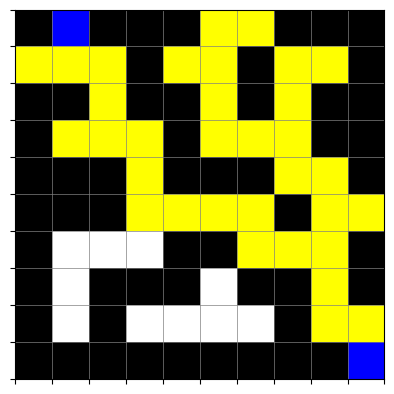

In [41]:
# Run DFS with visualization
dfs_path, dfs_explored, dfs_time = dfs_visualized(maze, start, end)

In [42]:
# Print out the execution times for comparison
print(f"BFS Execution Time: {bfs_time:.4f} seconds")
print(f"DFS Execution Time: {dfs_time:.4f} seconds")

BFS Execution Time: 9.4179 seconds
DFS Execution Time: 11.2083 seconds
